In [ ]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 14.0 MB/s eta 0:00:00


In [ ]:
!pip install  langchain langchain_groq

INFO: pip is looking at multiple versions of langchain-groq to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.1/467.1 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.11
    Uninstalling langchain-text-splitters-0.3.11:
      Successfully uninstalled langchain-text-splitters-0.3.11
ERROR: pip's dependency resolver

In [ ]:
##to read api key in google colab
from google.colab import userdata
##get your api_key



In [ ]:
## NOW WE WILL USE LANGSMITH  --- to track all the information  (create api key in langsmith website)
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"
os.environ["LANGCHAIN_API_KEY"] = langsmith


In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key,model="llama-3.1-8b-instant")

In [ ]:
##start building chatbot using langgraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END ## state graph helps in state management , start and end are for starting and ending node  to show workflow
##stategraph needs keep on changing based on some parameters
from langgraph.graph.message import add_messages  ## as you keep on adding the messages we will see that the state of agent will also get changed


In [ ]:
## It will control entire state management
class State(TypedDict):
  #Message have the type "list".The add_message function
  # in the annotation defines how this state key should be updated
  #(in this case ,it appends messages to the list ,rather than overwriting them)
  messages:Annotated[list,add_messages]

  ##start the process of graph building
graph_builder=StateGraph(State)


In [ ]:
graph_builder

In [ ]:
#Definition of chatbot
def chatbot(state:State):
  return{"messages":llm.invoke(state["messages"])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
##connect this chatbot to start and end node
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph=graph_builder.compile()

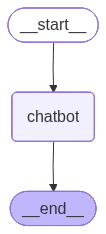

In [ ]:
## To display the graph
from IPython.display import Image , display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass




In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
    for event in graph.stream({'messages': ("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:", value["messages"].content)


User: hii
dict_values([{'messages': AIMessage(content='Hello. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 37, 'total_tokens': 55, 'completion_time': 0.017816809, 'prompt_time': 0.001903508, 'queue_time': 0.066236926, 'total_time': 0.019720317}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_75db6866d3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--91202e27-9471-47b0-a302-3c326fefac7c-0', usage_metadata={'input_tokens': 37, 'output_tokens': 18, 'total_tokens': 55})}])
content='Hello. Is there something I can help you with or would you like to chat?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 37, 'total_tokens': 55, 'completion_time': 0.017816809, 'prompt_time': 0.001903508, 'queue_time': 0.066236926, 'total_time': 0.019720317}, 'model_name': 'llama-3.1-8b-